<a href="https://colab.research.google.com/github/emms204/FashionMNIST-with-Pytorch/blob/main/FashionMnistPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(image_size, image_size), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
image_size = 16
composed = transforms.Compose([transforms.Resize((image_size,image_size)),transforms.ToTensor()])

In [ ]:
train_dataset = datasets.FashionMNIST(root='/.data', train=True, download=True, transform=composed)
validation_dataset = datasets.FashionMNIST(root='/.data',transform=composed,download=True,train=False)

In [ ]:
train_dataset[0][1]

9

Text(0.5, 1.0, 'Third')

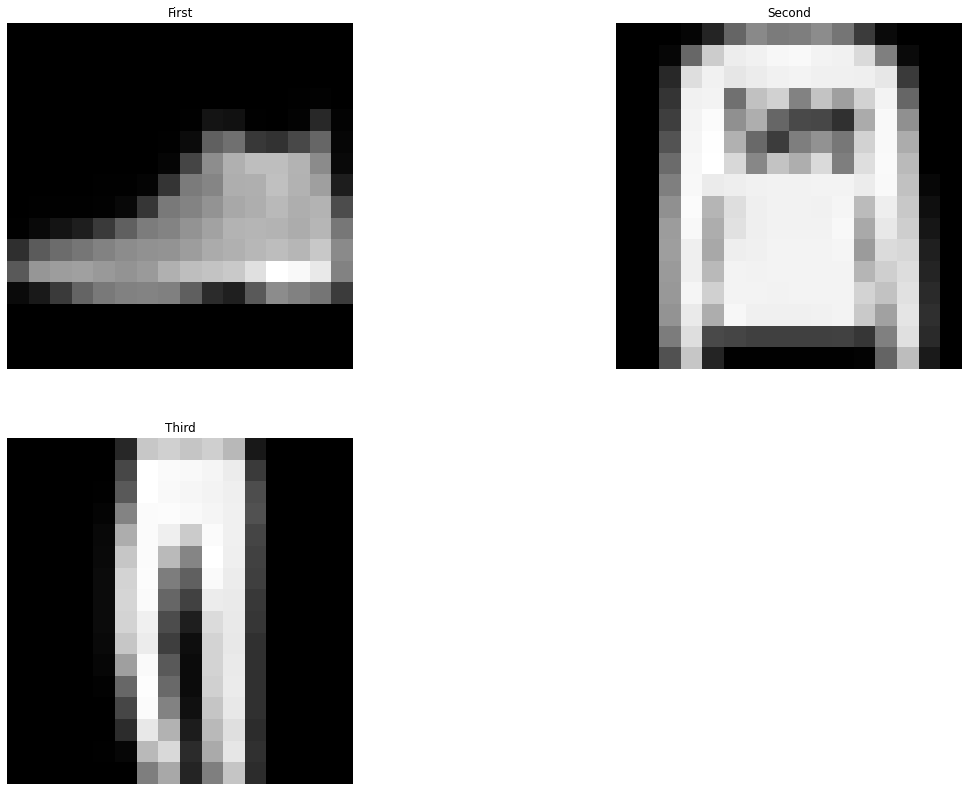

In [ ]:
fig = plt.figure(figsize=(20, 14))
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(validation_dataset[0][0].numpy().reshape(image_size, image_size), cmap='gray')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(validation_dataset[1][0].numpy().reshape(image_size, image_size), cmap='gray')
plt.axis('off')
plt.title("Second")
  
fig.add_subplot(2, 2, 3)
  
# showing image
plt.imshow(validation_dataset[2][0].numpy().reshape(image_size, image_size), cmap='gray')
plt.axis('off')
plt.title("Third")


In [ ]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    test_loss = []
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())

        correct=0
        testloss = 0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            testloss += criterion(z,y_test)
        accuracy = correct / N_test
        test = testloss/ len(validation_loader)
        accuracy_list.append(accuracy)
        test_loss.append(test.item())
        print("Epoch no.",epoch+1 ,"|accuracy: ", round(accuracy, 3),"%", "|total_loss: ", loss.item(),"|Test loss: ", round(test.item(), 3))
     
    return test_loss, accuracy_list, loss_list

In [ ]:
model = CNN_batch(out_1=16,out_2=32)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


In [ ]:
n_epochss = 10
test_loss_normal,accuracy_list_normal, loss_list_normal = train_model(model=model,n_epochs=n_epochss,train_loader=train_loader,
                                                     validation_loader=validation_loader,optimizer=optimizer)

Epoch no. 1 |accuracy:  0.857 % |total_loss:  0.2660914361476898 |Test loss:  0.406
Epoch no. 2 |accuracy:  0.869 % |total_loss:  0.2412799894809723 |Test loss:  0.375
Epoch no. 3 |accuracy:  0.872 % |total_loss:  0.2283095419406891 |Test loss:  0.362
Epoch no. 4 |accuracy:  0.876 % |total_loss:  0.2153586447238922 |Test loss:  0.343
Epoch no. 5 |accuracy:  0.881 % |total_loss:  0.19466283917427063 |Test loss:  0.329
Epoch no. 6 |accuracy:  0.883 % |total_loss:  0.18538564443588257 |Test loss:  0.327
Epoch no. 7 |accuracy:  0.885 % |total_loss:  0.17620542645454407 |Test loss:  0.319
Epoch no. 8 |accuracy:  0.884 % |total_loss:  0.1694650650024414 |Test loss:  0.322
Epoch no. 9 |accuracy:  0.886 % |total_loss:  0.15024973452091217 |Test loss:  0.318
Epoch no. 10 |accuracy:  0.886 % |total_loss:  0.158731609582901 |Test loss:  0.318


No handles with labels found to put in legend.


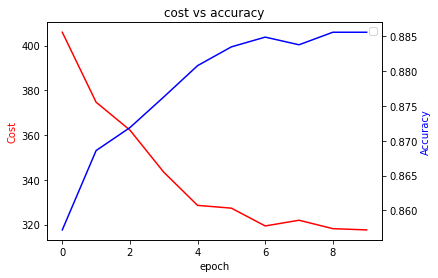

In [ ]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
ax2 = ax1.twinx()
ax1.plot([i for i in range(n_epochss)], [i*1000 for i in test_loss_normal], 'r')
ax2.plot([i for i in range(n_epochss)], accuracy_list_normal, 'b')

ax1.set_xlabel('epoch')
ax1.set_ylabel('Cost', color='r')
ax2.set_ylabel('Accuracy', color='b')

plt.title("cost vs accuracy")
plt.legend()

plt.show()
